<a href="https://colab.research.google.com/github/addicted-ai/fastai-tests/blob/main/MNIST_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import os

# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.7 MB/s 
     |████████████████████████████████| 1.2 MB 16.4 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 188 kB 41.1 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 51 kB 341 kB/s 


In [5]:
from fastai.vision.all import *
from fastbook import *

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)
# Checking path
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [7]:
# storing path of 3 & 7 of train dataset
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
# checking single image of 3
im3_path = threes[1]
im3 = Image.open(im3_path) # uses PIL library in bg
im3

In [9]:
# visualizing pixels of im3 image in numpy array
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [10]:
# visualizing pixels of im3 image in tensor object
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [11]:
#@title
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[3:25,4:21]) # total 28*28
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0
3,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0
4,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0
5,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0
6,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0
7,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0
8,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0
9,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0


In [12]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [13]:
three_tensors[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

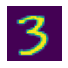

In [14]:
show_image(three_tensors[1])

In [15]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

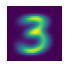

In [16]:
show_image(stacked_threes.mean(0))

In [17]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

## Checking distance of a 3 image from mean3 & mean7.
- We can use this 2 ways, absolute distance & RMSE
- RMSE will penalize bigger mistakes more heavily than the absolute loss.

In [18]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
print('Absolute distance from mean3:',dist_3_abs,'\nRMSE distance from mean3:',dist_3_sqr)

Absolute distance from mean3: tensor(0.1114) 
RMSE distance from mean3: tensor(0.2021)


In [19]:
dist_7_abs = (stacked_threes[1] - mean7).abs().mean()
dist_7_sqr = ((stacked_threes[1] - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr
print('Absolute distance from mean7:',dist_7_abs,'\nRMSE distance from mean7:',dist_7_sqr)

Absolute distance from mean7: tensor(0.1586) 
RMSE distance from mean7: tensor(0.3021)


- In both type of distance, we can see that image 3 is closer to mean3 than mean7. We can say that image 3 is more likely a image of 3 than an image of 7.

In [20]:
# Absolute distance(L1) & RMSE(L2) distance is inbuilt in Pythorch & generally imported as 'F'(Fastai imports that as F aswell)
F.l1_loss(stacked_threes[1].float(),mean7), F.mse_loss(stacked_threes[1],mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [21]:
# Building tensor for validation dataset (test dataset)
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [22]:
# doing same as dist_3_abs/l1 loss, but building a custom function to demonstrate + it can use broadcasting to calculate all images in stacked_threes or valid_3
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [23]:
valid_3_tens.shape, mean3.shape

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

In [24]:
# this is cool, we sent a tensor as a & b dimenssion is different as you can see above
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1326, 0.1192, 0.1061,  ..., 0.1113, 0.1487, 0.1369]),
 torch.Size([1010]))

In [25]:
(valid_3_tens-mean3).shape # see how 28*28 becomes 1010*28*28

torch.Size([1010, 28, 28])

In [26]:
# if distance is less from mean3=>true, else false
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [27]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [28]:
# Checking accuracy of model in validity dataset
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1-is_3(valid_7_tens).float().mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Not a Neural Network so far
- We have so far got mean of pixels of an image of 3. Then we checked the pixel similarity to classify images to 3 & 7.
- Model is not learning itself & there is no way to improve itself.
- We have not yet used weights, activation funtion or gradient descent to update weight.
- We are only using a distance metric to measure validity image from ideal mean image.

## Using Neural Network

### Preparing Data for pytorch

In [29]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28) # just concating 3 & 7 matrix
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1) # label 1 & 0 for classifying 3

train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [30]:
dset = list(zip(train_x,train_y)) # dataset in pytorch required to feed in this format
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [31]:
# Doing same for validity set
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x,valid_y)) # Pytorch Standard dataset that dataloader expects

In [32]:
dl = DataLoader(dset, batch_size=256) # dset already in (x,y) format, dataloader creates 256 mini batches
valid_dl = DataLoader(valid_dset, batch_size=256) # same for validity dataset

xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [33]:
# creating function to initialize parameter using a function
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)
weights.shape,bias.shape

(torch.Size([784, 1]), torch.Size([1]))

### Manually doing some stuffs to show how that would be working in pytorch

In [34]:
# Predicting for single training example
(train_x[0]*weights.T).sum() + bias # predictiong with initial parameter i.e random

tensor([1.1245], grad_fn=<AddBackward0>)

#### Putting together all function we are gonna use

In [69]:
# Predicting for whole training set using matrix multiplication
def linear1(xb): return xb@weights + bias

# Loss function that we'll be used in optimization step
def mnist_loss(predictions, targets):
 predictions = predictions.sigmoid()
 return torch.where(targets==1, 1-predictions, predictions).mean()

# a function to calculate gradient
def calc_grad(xb, yb, model):
 preds = model(xb)
 loss = mnist_loss(preds, yb)
 loss.backward()

# a function that'll calculate gradient, update bias & repeat for epoch no of time
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

def batch_accuracy(xb, yb):
 preds = xb.sigmoid()
 correct = (preds>0.5) == yb
 return correct.float().mean()
 
def validate_epoch(model):
 accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
 return round(torch.stack(accs).mean().item(), 4)

In [68]:
preds = linear1(train_x)
preds

tensor([[ 18.4315],
        [ 24.8498],
        [ 31.5383],
        ...,
        [-19.8435],
        [-18.2944],
        [-21.7867]], grad_fn=<AddBackward0>)

In [36]:
corrects = (preds>0.0).float() == train_y
corrects.float().mean().item() # gettting 53% accuracy in random initialization(in next run it'll change though)

0.48297837376594543

In [39]:
# trying it with a sample before running it in whole batch
batch = train_x[:4]
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0192), tensor([-0.1342]))

In [40]:
# because if we calculate gradient again, it'll add it to previously calculated gradient, so we set gradient to zero after using it
weights.grad.zero_()
bias.grad.zero_();

In [48]:
validate_epoch(linear1)

0.5253

In [67]:
lr = 1.
params = weights,bias
for i in range(20):
 train_epoch(linear1, lr, params)
 print(validate_epoch(linear1), end=' ')

0.6458 0.8382 0.9095 0.9295 0.9393 0.9496 0.9545 0.9589 0.9628 0.9633 0.9653 0.9658 0.9677 0.9682 0.9682 0.9692 0.9697 0.9702 0.9702 0.9706 

### Doing it Pytorch way

In [66]:
# re-initializing weights & biases(just doing again for no reason)
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
page 174